In [1]:
%matplotlib inline

In [2]:
import os
import glob
import json
import datetime
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [22]:
def objFromFile(filename):
    with open(filename, 'r') as fobj:
        json_str = fobj.readline()
        fobj.close()
    return json.loads(json_str)

In [29]:
data_home = os.path.expanduser('~/Documents/Tesla')
folders = glob.glob('{}/2*'.format(data_home))
folders.sort()

t = []
b = []
for folder in folders:
    files = glob.glob('{}/*.json'.format(folder))
    files.sort()
    file = files[-1]
    # print('{}'.format(file))
    data = objFromFile(file)
    o = data['charge_state']
    t.append(datetime.datetime.fromtimestamp(o['timestamp'] / 1000))
    b.append(o['battery_level'])
    print('{} -> {}% {}'.format(os.path.basename(file), o['battery_level'], o['charging_state']))

20190724-2315.json -> 65% Disconnected
20190725-2130.json -> 58% Disconnected
20190726-2045.json -> 85% Disconnected
20190727-1345.json -> 79% Disconnected
20190728-1745.json -> 79% Disconnected
20190729-2000.json -> 83% Disconnected
20190730-2300.json -> 71% Disconnected
20190731-2315.json -> 70% Disconnected
20190801-1330.json -> 68% Disconnected


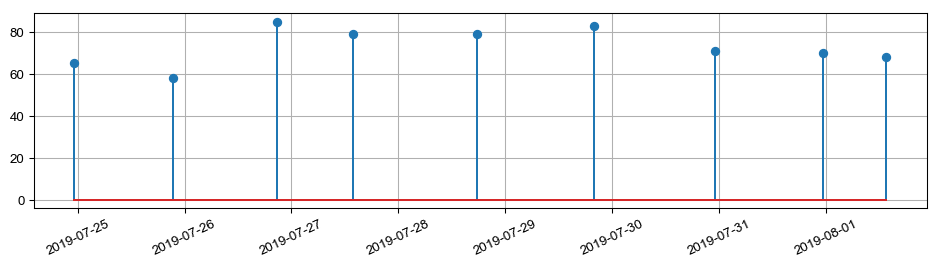

In [33]:
fig = plt.figure(figsize=(12, 3), dpi=96)
plt.subplots_adjust(bottom=0.2)
plt.xticks(rotation=25)
ax = plt.gca()
xfmt = matplotlib.dates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(xfmt)
# plt.plot(t, b, '.-')
plt.stem(t, b)
plt.grid()

In [ ]:
# files = glob.glob('{}/2*/*.json'.format(data_home))
# files.sort()

In [ ]:
t = []
b = []
for file in files:
    data = objFromFile(file)
    o = data['drive_state']
    
    o = data['charge_state']
    t.append(datetime.datetime.fromtimestamp(o['timestamp'] / 1000))
    b.append(o['battery_level'])
    print('{} -> {}% {}'.format(os.path.basename(file), o['battery_level'], o['charging_state']))

In [ ]:
fig = plt.figure(figsize=(12, 3), dpi=96)
plt.subplots_adjust(bottom=0.2)
plt.xticks(rotation=25)
ax = plt.gca()
xfmt = matplotlib.dates.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)
# plt.plot(t, b, '.-')
plt.stem(t, b)

In [ ]:
for file in files[-5:]:
    data = objFromFile(file)
    display(file)
    display(data['drive_state'])